In [1]:
%matplotlib inline

# 6 - Graph Filtering

If this tutorial we are going to demonstrate the use and effect of different graph filtering (thresholding schemes)

- - -


### Load and prepare data 

In [44]:
import numpy as np
np.set_printoptions(precision=2, threshold=np.nan)

In [45]:
rng = np.random.RandomState(0)

In [46]:
mtx = rng.rand(32, 32)
mtx = (mtx + mtx.T) / 2.0
np.fill_diagonal(mtx, 1.0)

### Load all related modules and methods

In [48]:
from scipy.sparse.csgraph import minimum_spanning_tree

In [49]:
from dyconnmap.graphs import threshold_eco, threshold_omst_global_cost_efficiency

### Filter the matrix

* Minumum Spanning Tree 

In [56]:
mtx_mst = minimum_spanning_tree(mtx).todense()

* Orthogonal Minimum Spanning Tree 

In [57]:
nCIJtree, CIJtree, _, _, global_cost_eff_max, cost_max, cost, global_cost_eff = threshold_omst_global_cost_efficiency(mtx)

/home/makism/Github/dyconnmap-public/dyconnmap/graphs/threshold.py:436: RuntimeWarning: divide by zero encountered in true_divide
  tmp_mtx = 1.0 / CIJnotintree
/home/makism/Github/dyconnmap-public/dyconnmap/graphs/threshold.py:496: RuntimeWarning: divide by zero encountered in true_divide
  global_eff = bct.efficiency_wei(1.0 / CIJtree)


* Eco filtering 

In [58]:
mtx_bin, mtx_eco, _ = threshold_eco(mtx)

### Plot

In [59]:
import matplotlib.pyplot as plt

/opt/py36/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


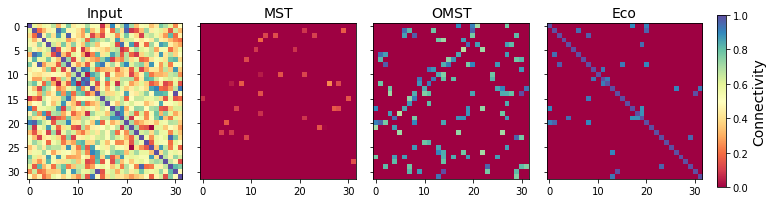

In [309]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(10, 8), sharey=True)

im = axes[0].imshow(mtx, vmin=0.0, vmax=1.0, cmap=plt.cm.Spectral)
axes[0].set_title('Input', fontsize=14)

axes[1].imshow(mtx_mst, vmin=0.0, vmax=1.0, cmap=plt.cm.Spectral)
axes[1].set_title('MST', fontsize=14)

axes[2].imshow(CIJtree, vmin=0.0, vmax=1.0, cmap=plt.cm.Spectral)
axes[2].set_title('OMST', fontsize=14)

axes[3].imshow(mtx_eco, vmin=0.0, vmax=1.0, cmap=plt.cm.Spectral)
axes[3].set_title('Eco', fontsize=14)

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([1.0, 0.35, 0.0125, 0.300])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label('Connectivity', fontsize=14)

plt.tight_layout()
plt.show()

### Sparsity 

In [312]:
nnz = 32 * 32
nnz_mst = np.count_nonzero(mtx_mst == 0)
nnz_omst = np.count_nonzero(CIJtree == 0)
nnz_eco = np.count_nonzero(mtx_eco == 0)

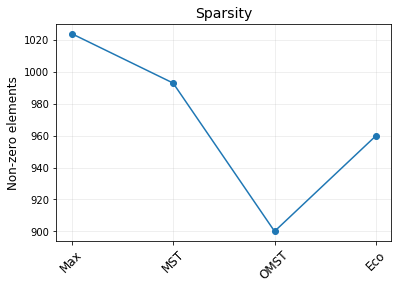

In [313]:
plt.figure()
plt.plot([nnz, nnz_mst, nnz_omst, nnz_eco], 'o-')
plt.axis('tight')
plt.ylabel('Non-zero elements', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Max', 'MST', 'OMST', 'Eco'], rotation=45, fontsize=12)
plt.grid(alpha=0.25)
plt.title('Sparsity', fontsize=14)
plt.show()